# Data Mining Homework 3
## Question 8
### Mohammad Bahrami - 9724133

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Iris.csv', index_col=0)
X = dataset.loc[:, dataset.columns != 'Class']
Y = dataset['Class']
dataset

,Class,Petal length,Sepal length,Sepal width,Petal width
0,1,51,35,14,2
1,1,49,30,14,2
2,1,47,32,13,2
3,1,46,31,15,2
4,1,50,36,14,2
...,...,...,...,...,...
145,3,67,30,52,23
146,3,63,25,50,19
147,3,65,30,52,20
148,3,62,34,54,23


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [4]:
from sklearn.svm import LinearSVC
lin_svc = LinearSVC().fit(X_train, Y_train)
lin_predictions = lin_svc.predict(X_test)

/home/indirected/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


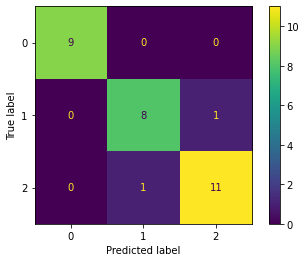

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, lin_predictions)
ConfusionMatrixDisplay(cm).plot()

The model is performing very well as a simple linear model. It has only two wrong guesses.

### Part a

In [7]:
from sklearn.svm import SVC
poly_error = []
for d in range(1, 11):
    pol_svc = SVC(kernel='poly', degree=d).fit(X_train, Y_train)
    acc = pol_svc.score(X_test, Y_test)
    poly_error.append(1 - acc)
poly_error = np.array(poly_error)

First Best Model's Error: 0.0 at degree: 2


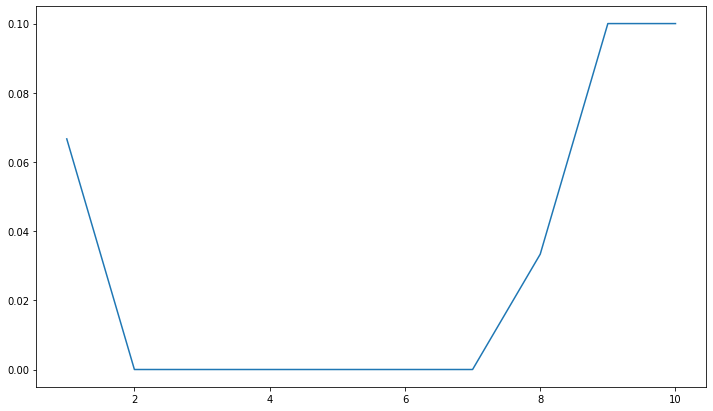

In [10]:
print(f'First Best Model\'s Error: {poly_error.min()} at degree: {poly_error.argmin() + 1}')
fig, ax = plt.subplots()
ax.plot(
    np.arange(1, 11),
    poly_error,
)
fig.set_size_inches((12, 7))

A linear Kernel (degree = 1) has some error on the test set dou to model's simplicity. From polynomial degree 2 to 7 the model has no error. but with degrees higher than 7, the model starts to overfit.

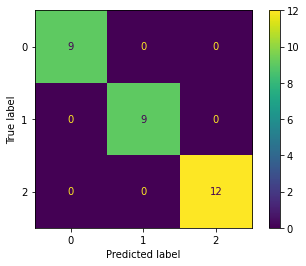

In [11]:
pol_svc = SVC(kernel='poly', degree=2).fit(X_train, Y_train)
pol_predictions = pol_svc.predict(X_test)
cm = confusion_matrix(Y_test, pol_predictions)
ConfusionMatrixDisplay(cm).plot()

We can see that unlike the linear regression that had 2 wrong predictions, the polynomial svm with a degree of two manages to predict all the samples in the test set correctly.